# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

∇L(w) = (-2/n)  X^T  (y - Xw)


### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [6]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [10]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [8]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [11]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/96047188/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/96326024/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/96047232/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/96441144/


* **LinearRegression**:  https://contest.yandex.ru/contest/54610/run-report/96348223/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [13]:
data = pd.read_csv('autos.csv')

In [15]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [16]:
data.isna().sum()


brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

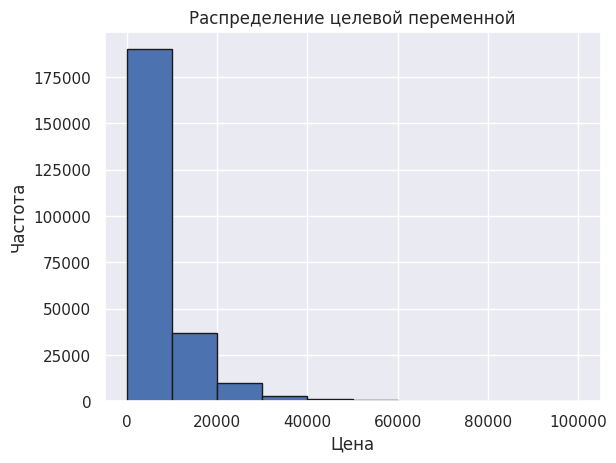

In [14]:
df = pd.DataFrame(data)

# Построим график распределения цен
plt.hist(df['price'], bins=10, edgecolor='k')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной')
plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

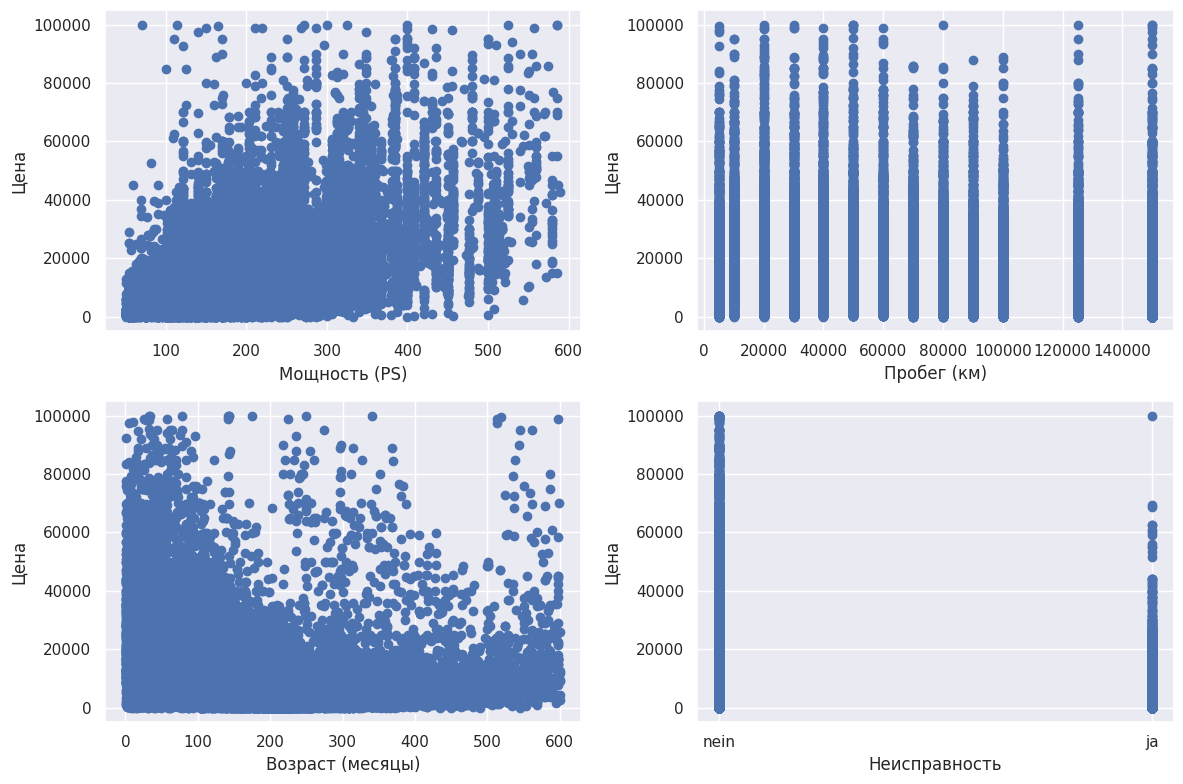

In [17]:
# Построим графики зависимости цены от признаков
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df['powerPS'], df['price'])
plt.xlabel('Мощность (PS)')
plt.ylabel('Цена')

plt.subplot(2, 2, 2)
plt.scatter(df['kilometer'], df['price'])
plt.xlabel('Пробег (км)')
plt.ylabel('Цена')

plt.subplot(2, 2, 3)
plt.scatter(df['autoAgeMonths'], df['price'])
plt.xlabel('Возраст (месяцы)')
plt.ylabel('Цена')

plt.subplot(2, 2, 4)
plt.scatter(df['notRepairedDamage'], df['price'])
plt.xlabel('Неисправность')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()

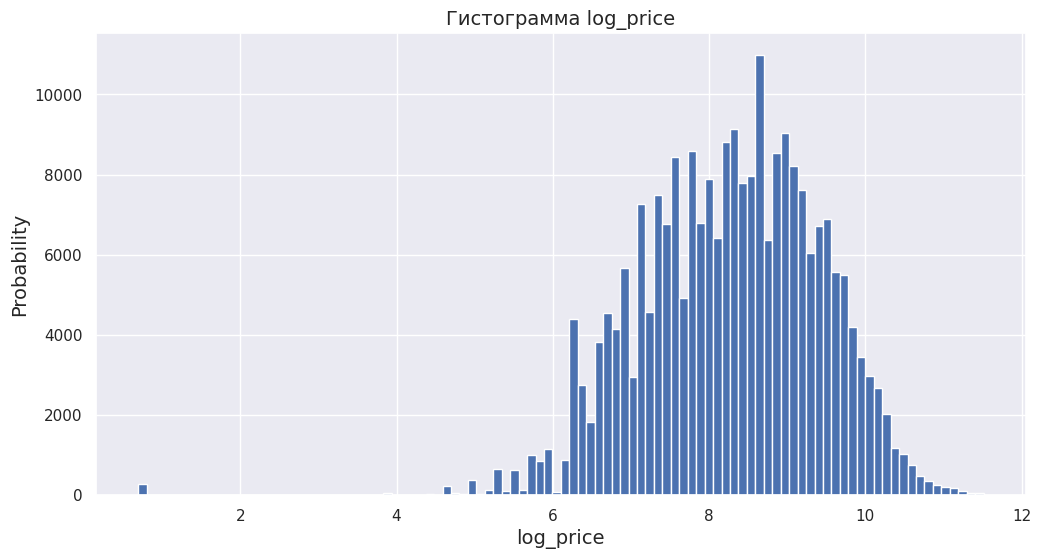

In [23]:
np.log1p(data['price']).hist(figsize=(12, 6), bins=100)
plt.xlabel('log_price', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма log_price', fontsize=14)
plt.show()

In [24]:
data['log_price'] = np.log1p(data['price'])
print(data[(data['log_price'] <= 4) | (data['price'] > 30000)].shape[0])
data = data[(data['log_price'] >= 4) & (data['price'] <= 30000)]

5041


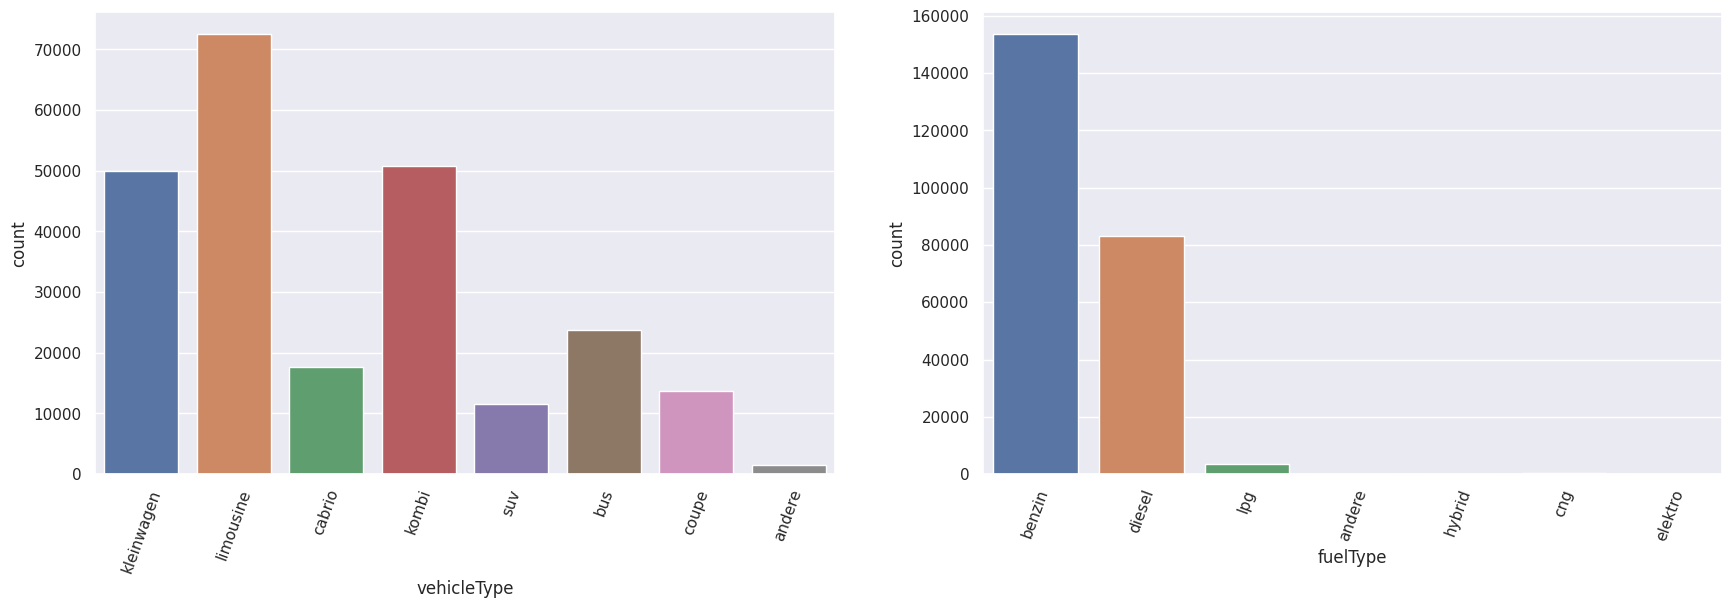

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(21, 6))
for ax, categ_ in zip(axs, ['vehicleType', 'fuelType']):
    sns.countplot(x=categ_, data=data, ax=ax)
    ax.xaxis.set_tick_params(rotation=70)
plt.show();

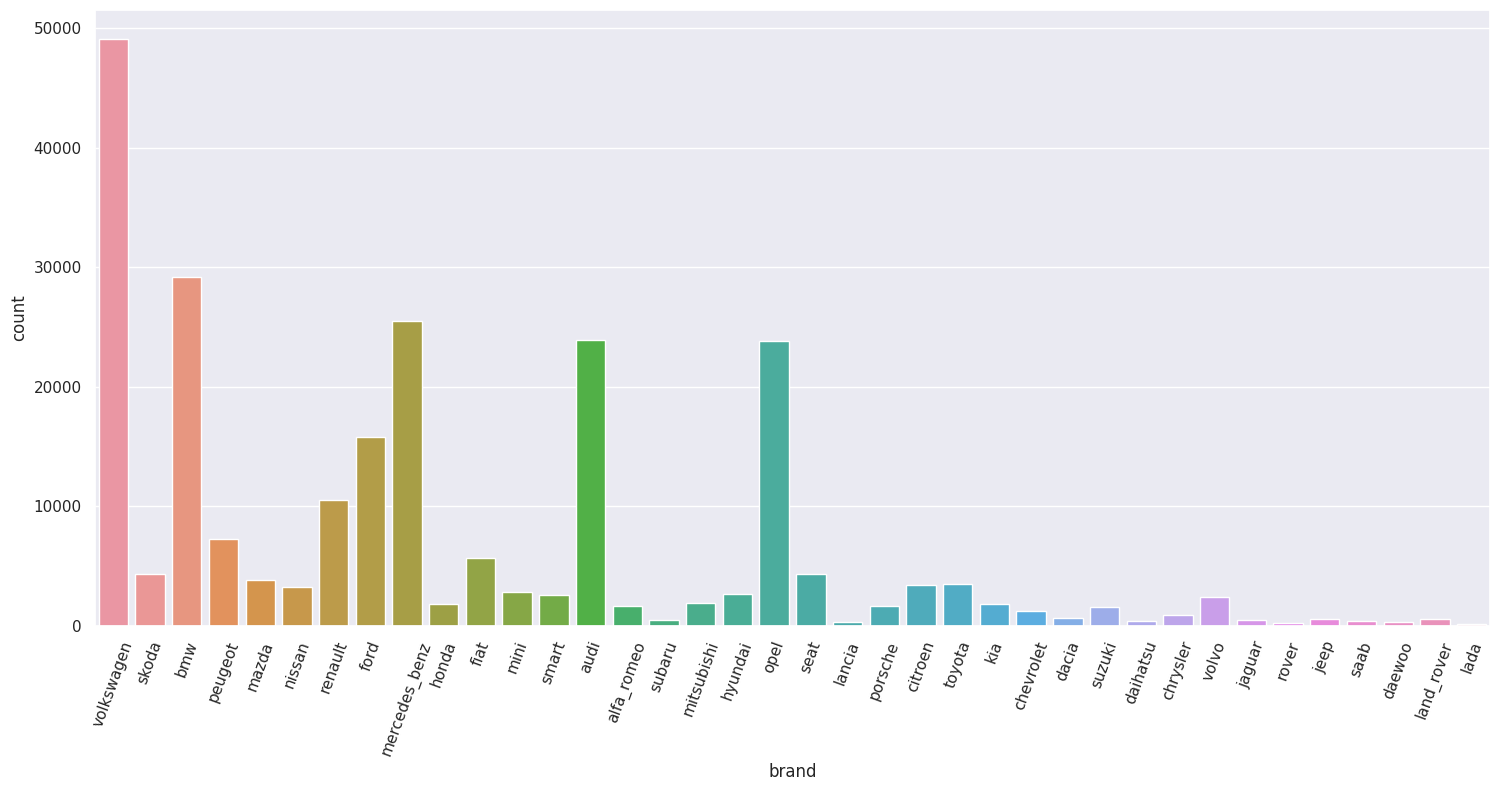

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(x='brand', data=data)
plt.xticks(rotation=70)
plt.show();

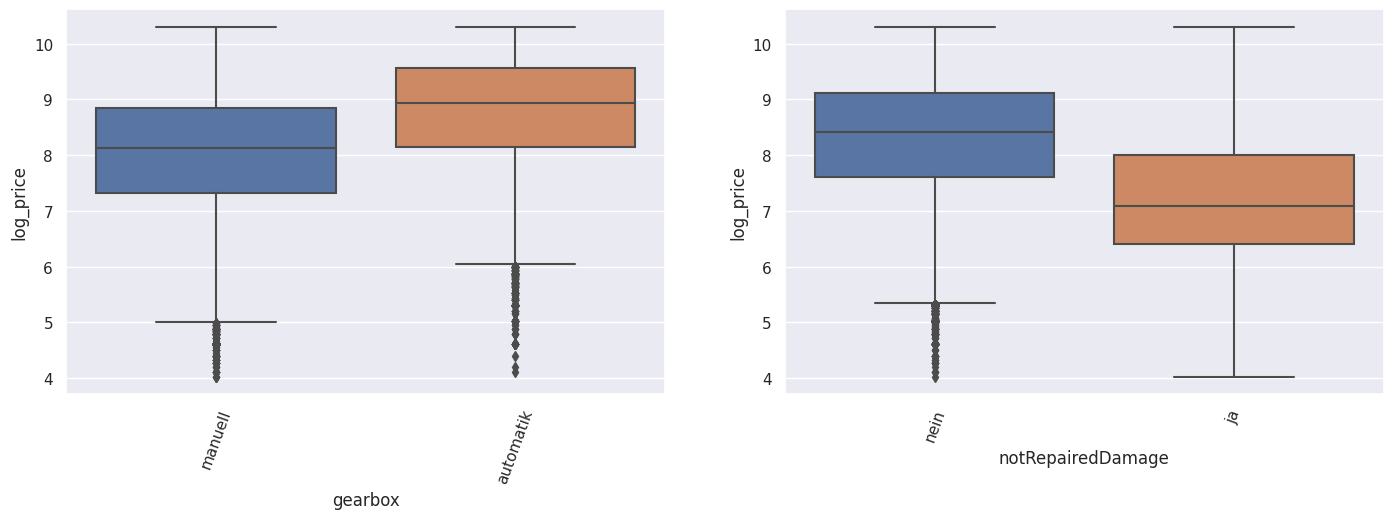

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5))
for ax, categ_ in zip(axs, ['gearbox', 'notRepairedDamage']):
    sns.boxplot(x=categ_, y='log_price', data=data, ax=ax)
    ax.xaxis.set_tick_params(rotation=70)
plt.show();

Из графиков видно:

- Мощность автомобиля (powerPS) имеет положительную корреляцию с ценой.

- Пробег (kilometer) не имеет явной зависимости от цены.

- Возраст автомобиля в месяцах (autoAgeMonths) имеет отрицательную корреляцию с ценой.

- Неисправность (notRepairedDamage) может влиять на цену, но для дальнейшего анализа необходимо преобразовать этот признак в числовой формат.

Для полезных признаков:

1. brand и model - категориальные признаки, необходимо предобработать с помощью one-hot encoding.
2. vehicleType и fuelType - категориальные признаки, также потребуется one-hot encoding.
3. notRepairedDamage, gearbox- бинарный признак, можно заменить его значения на числа (0 и 1).

Трансформации признаков:

- Логарифмическое преобразование цены может быть полезным, так как нормализует ее распределение и сделает модель более стабильной.

In [26]:
data.loc[:, 'notRepairedDamage'] = data['notRepairedDamage'].map({'nein': 0, 'ja': 1})
data.loc[:, 'gearbox'] = data['gearbox'].map({'manuell': 0, 'automatik': 1})

<ipython-input-26-1d41fa537df3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'notRepairedDamage'] = data['notRepairedDamage'].map({'nein': 0, 'ja': 1})
<ipython-input-26-1d41fa537df3>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'notRepairedDamage'] = data['notRepairedDamage'].map({'nein': 0, 'ja': 1})
<ipython-input-26-1d41fa537df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [27]:
data['is_auto_gearbox'] = data['gearbox'].apply(lambda x: 1 if x == 'automatik' else 0)
data.drop('gearbox', axis=1, inplace=True)
data['notRepairedDamage'] = data['notRepairedDamage'].apply(lambda x: 1 if x == 'ja' else 0)
data = data[data['autoAgeMonths'] <= 500] # из графика видно, что после 500 много точек выбиваются из кластера,
                                          # кроме того, можно посмотреть на гистограмму

<ipython-input-27-adc352d0613a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_auto_gearbox'] = data['gearbox'].apply(lambda x: 1 if x == 'automatik' else 0)
<ipython-input-27-adc352d0613a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('gearbox', axis=1, inplace=True)
<ipython-input-27-adc352d0613a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [28]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'autoAgeMonths']
other = ['is_auto_gearbox', 'notRepairedDamage']

In [29]:
x = data[categorical + numeric + other].copy()
x['bias'] = 1
other += ['bias']
y = data['log_price']
#y = data['price']
x

,brand,model,vehicleType,fuelType,powerPS,autoAgeMonths,is_auto_gearbox,notRepairedDamage,bias
0,volkswagen,golf,kleinwagen,benzin,75,177,0,0,1
1,skoda,fabia,kleinwagen,diesel,69,93,0,0,1
2,bmw,3er,limousine,benzin,102,246,0,0,1
3,peugeot,2_reihe,cabrio,benzin,109,140,0,0,1
4,mazda,3_reihe,limousine,benzin,105,136,0,0,1
...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,diesel,140,69,0,0,1
241186,seat,leon,limousine,benzin,225,142,0,0,1
241187,smart,fortwo,cabrio,benzin,101,192,0,0,1
241188,volkswagen,transporter,bus,diesel,102,241,0,0,1


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=30)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lambdas_ = np.logspace(-4, 1, 5)
dimension = x_train.shape[1]
table_df = pd.DataFrame(columns=['method', 'lambda', 'mse_validation', 'mse_train', 'mse_test', 'val_r2', 'train_r2', 'test_r2', 'iters_to_conv'])


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for l in lambdas_:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': dimension,
                'lambda_': l
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(x_train.toarray(), y_train.to_numpy())
        iters_to_conv = regression.descent.lr.iteration

        y_val_pred = regression.predict(x_val.toarray())
        y_train_pred = regression.predict(x_train.toarray())
        y_test_pred = regression.predict(x_test.toarray())

        val_mse = mean_squared_error(y_val_pred, y_val, squared=True)
        train_mse = mean_squared_error(y_train_pred, y_train, squared=True)
        test_mse = mean_squared_error(y_test_pred, y_test, squared=True)

        val_r2 = r2_score(y_val, y_val_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        d = {'method' : descent_name, 'lambda' : l, 'mse_validation' : val_mse,
             'mse_train' : train_mse, 'mse_test' : test_mse, 'val_r2' : val_r2,
             'train_r2' : train_r2, 'test_r2' : test_r2, 'iters_to_conv' : iters_to_conv}
        table_df = table_df.append(d, ignore_index=True)


table_df

<ipython-input-47-ccb79a98c935>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(d, ignore_index=True)
<ipython-input-47-ccb79a98c935>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(d, ignore_index=True)
<ipython-input-47-ccb79a98c935>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(d, ignore_index=True)
<ipython-input-47-ccb79a98c935>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(d, ignore_index=True)
<ipython-input-47-ccb79a98c935>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas

,method,lambda,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
0,full,0.000100,4.290112e+01,4.269279e+01,4.267180e+01,-3.606790e+01,-3.542018e+01,-3.608675e+01,1
1,full,0.001778,3.405128e+01,3.381926e+01,3.379910e+01,-2.842136e+01,-2.785039e+01,-2.837534e+01,7
2,full,0.031623,1.939870e+00,1.920211e+00,1.911592e+00,-6.761073e-01,-6.380856e-01,-6.613952e-01,81
3,full,0.562341,4.644616e-01,4.718381e-01,4.718605e-01,5.986908e-01,5.974864e-01,5.898985e-01,46
4,full,10.000000,6.513461e+230,6.524690e+230,6.541821e+230,-5.627831e+230,-5.566054e+230,-5.685602e+230,300
5,stochastic,0.000100,3.506848e+01,3.494610e+01,3.491732e+01,-2.930025e+01,-2.881166e+01,-2.934720e+01,1
6,stochastic,0.001778,4.190494e+01,4.166199e+01,4.168416e+01,-3.520716e+01,-3.454083e+01,-3.522837e+01,9
7,stochastic,0.031623,2.122042e+00,2.101963e+00,2.098197e+00,-8.335101e-01,-7.931332e-01,-8.235767e-01,77
8,stochastic,0.562341,3.905484e-01,3.992041e-01,3.935338e-01,6.625541e-01,6.594487e-01,6.579735e-01,210
9,stochastic,10.000000,5.758482e+228,5.777839e+228,5.794706e+228,-4.975507e+228,-4.928934e+228,-5.036271e+228,300


In [ ]:
table_df

In [48]:
mv_min = table_df.groupby('method')[['mse_validation']].min()
print('Наилучшая длина шага для каждого метода с точки зрения ошибки')
opt_lambd_df = table_df[table_df['mse_validation'].isin(mv_min['mse_validation'])]
opt_lambd_df


Наилучшая длина шага для каждого метода с точки зрения ошибки


,method,lambda,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
3,full,0.562341,0.464462,0.471838,0.471860,0.598691,0.597486,0.589899,46
8,stochastic,0.562341,0.390548,0.399204,0.393534,0.662554,0.659449,0.657974,210
13,momentum,0.562341,0.331034,0.337090,0.331647,0.713976,0.712437,0.711760,102
19,adam,10.000000,0.296241,0.301757,0.299819,0.744039,0.742578,0.739423,217


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [50]:
err_iter_df = pd.DataFrame(columns=['method', 'iter', 'loss_on_iter'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
    'descent_name': descent_name,
    'kwargs': {
        'dimension': dimension,
        'lambda_': opt_lambd_df.loc[opt_lambd_df['method'] == descent_name, 'lambda'].values[0]
    }
}
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train.toarray(), y_train.to_numpy())

    for it, err in enumerate(regression.loss_history):
        d = {'method' : descent_name, 'iter': it, 'loss_on_iter' : err}
        err_iter_df = err_iter_df.append(d, ignore_index=True)

err_iter_df

<ipython-input-50-39756f5ba683>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  err_iter_df = err_iter_df.append(d, ignore_index=True)
<ipython-input-50-39756f5ba683>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  err_iter_df = err_iter_df.append(d, ignore_index=True)
<ipython-input-50-39756f5ba683>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  err_iter_df = err_iter_df.append(d, ignore_index=True)
<ipython-input-50-39756f5ba683>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  err_iter_df = err_iter_df.append(d, ignore_index=True)
<ipython-input-50-39756f5ba683>:16: FutureWarning: The frame.append method is deprecated and wil

,method,iter,loss_on_iter
0,full,0,36.426283
1,full,1,8.611746
2,full,2,1.211160
3,full,3,0.761098
4,full,4,0.715968
...,...,...,...
550,adam,209,0.301495
551,adam,210,0.301491
552,adam,211,0.301486
553,adam,212,0.301482


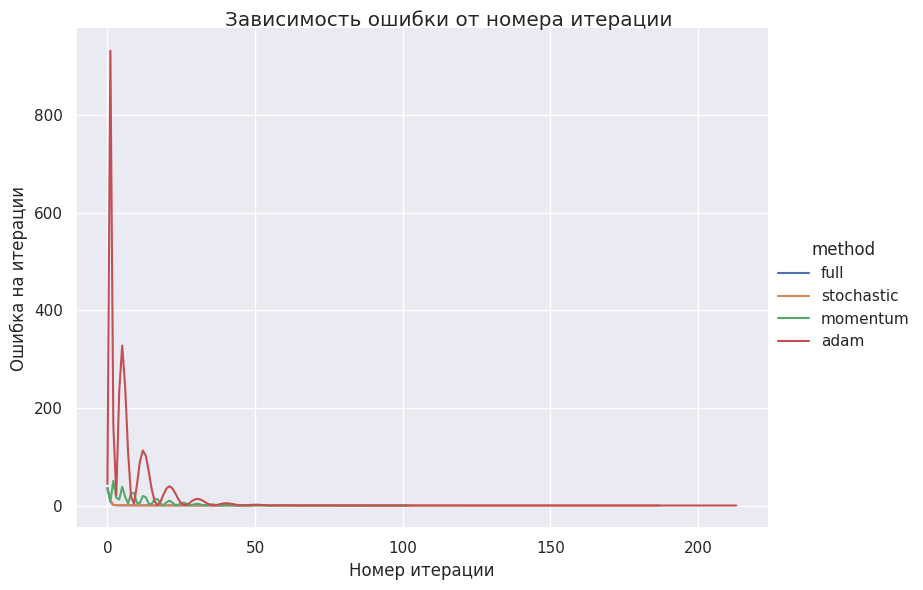

In [51]:
ax = sns.relplot(data=err_iter_df, x='iter', y='loss_on_iter', hue='method', kind='line', height=6, aspect=8/6)
ax.set_axis_labels('Номер итерации', 'Ошибка на итерации')
ax.fig.suptitle('Зависимость ошибки от номера итерации')
plt.subplots_adjust(top=0.95)


Как будто бы стохастический смотрится тут лучше всего, адам сходится дольше всего, но демонстрирует лучшую ошибку мсе

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [36]:
import time
batch_sizes = np.arange(5, 500, 10)
k=5
mean_conv_time_dict = {}
mean_iter_dict = {}

for b_size in batch_sizes:
    time_lst = []
    iter_lst = []
    for _ in range(k):

        descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension' : dimension,
            #'lambda_' : 0.5,
            'batch_size' : b_size
        }
    }
        regression = LinearRegression(descent_config=descent_config)
        tic = time.perf_counter()
        regression.fit(x_train.toarray(), y_train.to_numpy())
        toc = time.perf_counter()
        time_to_conv = toc - tic
        iters_to_conv = regression.descent.lr.iteration
        time_lst.append(time_to_conv)
        iter_lst.append(iters_to_conv)

    mean_conv_time_dict[b_size] = sum(time_lst) / k
    mean_iter_dict[b_size] = sum(iter_lst) / k

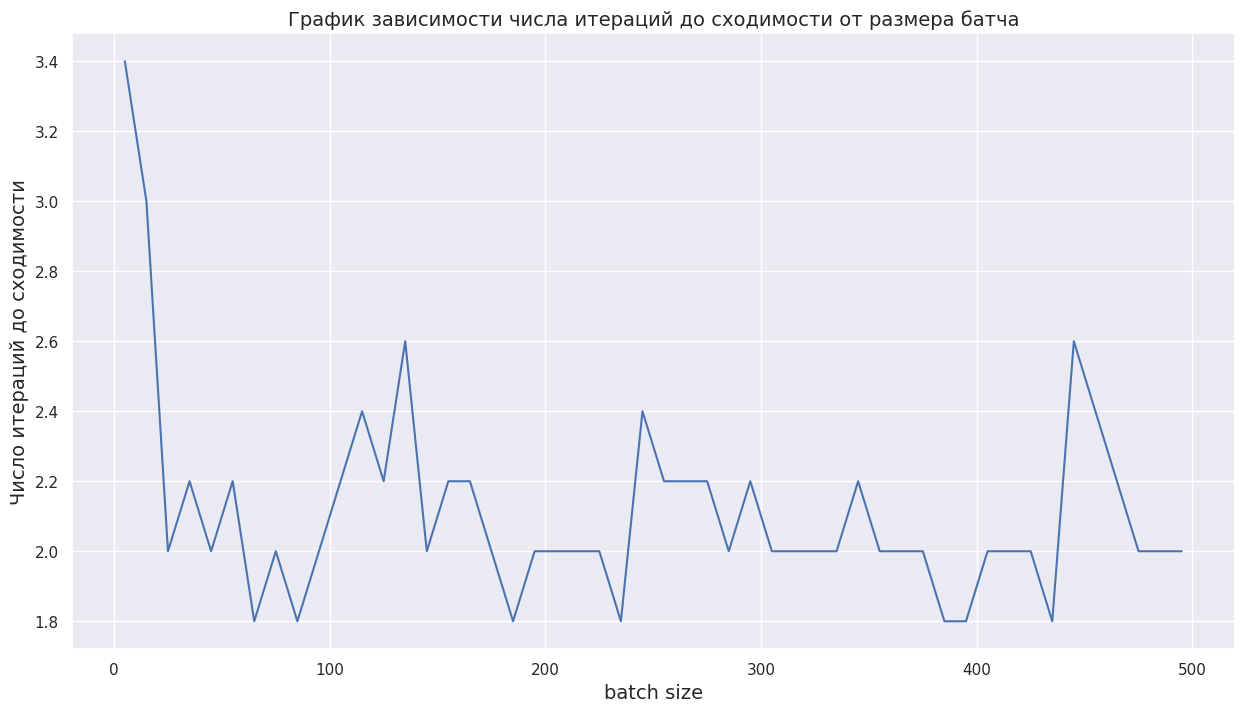

In [37]:
iter_plot_list = sorted(mean_iter_dict.items())
x, y = zip(*iter_plot_list)
plt.figure(figsize=(15, 8))
plt.xlabel('batch size', fontsize=14)
plt.ylabel('Число итераций до сходимости', fontsize=14)
plt.title('График зависимости числа итераций до сходимости от размера батча', fontsize=14)
plt.plot(x, y)
plt.show()

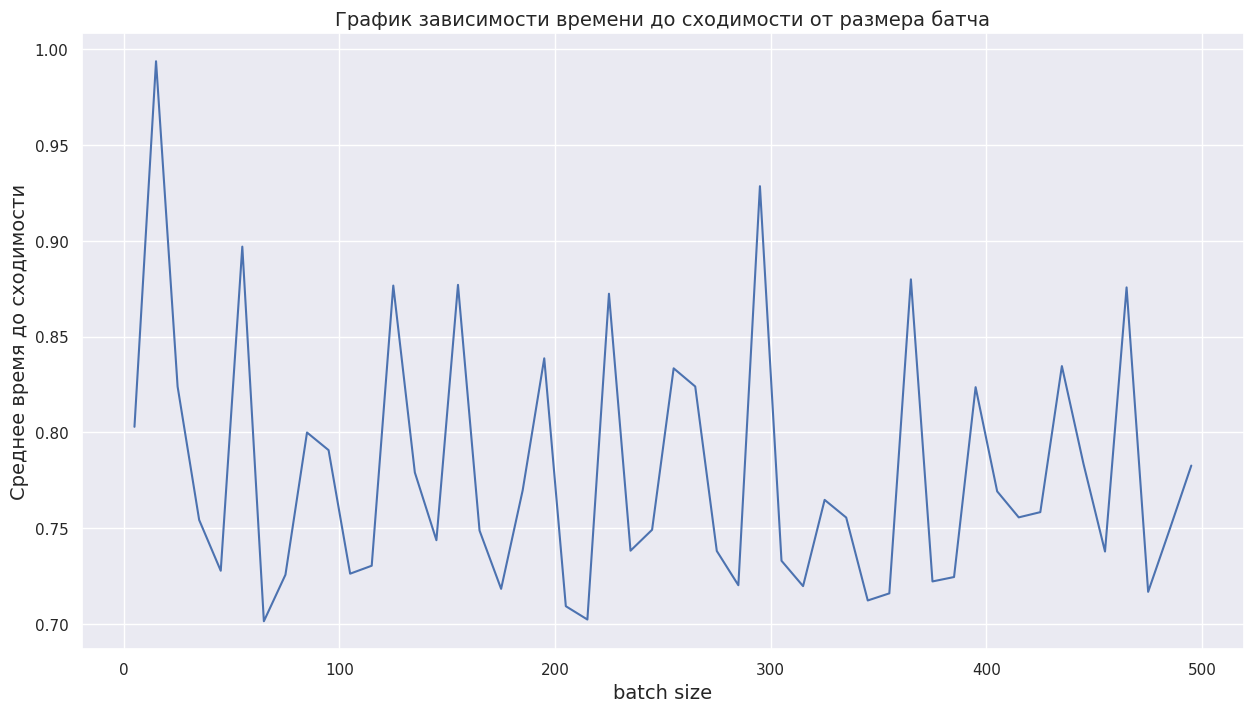

In [38]:
time_plot_list = sorted(mean_conv_time_dict.items())
x, y = zip(*time_plot_list)
plt.figure(figsize=(15, 8))
plt.xlabel('batch size', fontsize=14)
plt.ylabel('Среднее время до сходимости', fontsize=14)
plt.title('График зависимости времени до сходимости от размера батча', fontsize=14)
plt.plot(x, y)
plt.show()


`### ваше решение тут ###`

1. Количество шагов до сходимости уменьшается с увеличением размера батча. Это свидетельствует о том, что большие батчи обеспечивают более стабильное обновление параметров модели, что ведет к быстрой сходимости.
2. Время до сходимости уменьшается с увеличением размера батча. Это объясняется тем, что большие батчи позволяют эффективнее использовать вычислительные ресурсы, так как операции с массивами данных обычно более эффективны, чем операции с отдельными элементами.
3. Однако, слишком большие батчи могут требовать большего объема памяти и приводить к более долгому времени обучения на каждой итерации. Поэтому важно найти баланс между размером батча и эффективностью обучения.

Итак, для стохастического градиентного спуска типичным выбором размера батча является значения порядка 10-100, которое обеспечивает хороший компромисс между скоростью обучения и эффективностью вычислений.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96441076/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [52]:
lambdas_ = np.logspace(-4, 1, 5)
mus_ = np.logspace(-4, 0, 5)
dimension = x_train.shape[1]
mu_lamd_df = pd.DataFrame(columns=['method', 'lambda', 'mu', 'mse_validation', 'mse_train', 'mse_test', 'val_r2', 'train_r2', 'test_r2', 'iters_to_conv'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for l in lambdas_:
        for mu in mus_:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': l,
                    'mu': mu
                }
            }
            regression = LinearRegression(descent_config=descent_config)
            regression.fit(x_train.toarray(), y_train.to_numpy())
            iters_to_conv = regression.descent.lr.iteration

            y_val_pred = regression.predict(x_val.toarray())
            y_train_pred = regression.predict(x_train.toarray())
            y_test_pred = regression.predict(x_test.toarray())

            val_mse = mean_squared_error(y_val_pred, y_val, squared=True)
            train_mse = mean_squared_error(y_train_pred, y_train, squared=True)
            test_mse = mean_squared_error(y_test_pred, y_test, squared=True)

            val_r2 = r2_score(y_val, y_val_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)

            d = {'method' : descent_name, 'lambda' : l, 'mu' : mu, 'mse_validation' : val_mse,
                 'mse_train' : train_mse, 'mse_test' : test_mse, 'val_r2' : val_r2,
                 'train_r2' : train_r2, 'test_r2' : test_r2, 'iters_to_conv' : iters_to_conv}
            mu_lamd_df = mu_lamd_df.append(d, ignore_index=True)


mu_lamd_df

<ipython-input-52-e000a3c4fc84>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mu_lamd_df = mu_lamd_df.append(d, ignore_index=True)
<ipython-input-52-e000a3c4fc84>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mu_lamd_df = mu_lamd_df.append(d, ignore_index=True)
<ipython-input-52-e000a3c4fc84>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mu_lamd_df = mu_lamd_df.append(d, ignore_index=True)
<ipython-input-52-e000a3c4fc84>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mu_lamd_df = mu_lamd_df.append(d, ignore_index=True)
<ipython-input-52-e000a3c4fc84>:37: FutureWarning: The frame.append method is deprecated and will be rem

,method,lambda,mu,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
0,full,0.0001,0.0001,41.048195,40.884261,40.897845,-34.466908,-33.877368,-34.544970,1
1,full,0.0001,0.0010,41.506811,41.273203,41.183903,-34.863167,-34.209165,-34.793588,1
2,full,0.0001,0.0100,42.216856,42.068053,42.053481,-35.476668,-34.887233,-35.549352,1
3,full,0.0001,0.1000,42.154819,41.862436,41.844702,-35.423066,-34.711826,-35.367899,1
4,full,0.0001,1.0000,40.259885,39.992683,39.983095,-33.785784,-33.116785,-33.749946,1
...,...,...,...,...,...,...,...,...,...,...
95,adam,10.0000,0.0001,0.297002,0.304391,0.301141,0.743381,0.740332,0.738274,300
96,adam,10.0000,0.0010,0.307559,0.315279,0.309380,0.734260,0.731043,0.731113,300
97,adam,10.0000,0.0100,0.400747,0.413798,0.408912,0.653742,0.646999,0.644608,300
98,adam,10.0000,0.1000,0.988481,1.017621,1.007816,0.145922,0.131892,0.124091,300


In [53]:
# YOUR CODE:
mv_min_lm = mu_lamd_df.groupby('method')[['mse_validation']].min()
print('Наилучшая длина шага для каждого метода с точки зрения ошибки')
opt_lambd_df_lm = mu_lamd_df[mu_lamd_df['mse_validation'].isin(mv_min_lm['mse_validation'])]
opt_lambd_df_lm

Наилучшая длина шага для каждого метода с точки зрения ошибки


,method,lambda,mu,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
17,full,0.562341,0.0100,0.576445,0.597432,0.587374,0.501933,0.490345,0.489504,203
41,stochastic,0.562341,0.0010,0.487188,0.508595,0.509133,0.579055,0.566130,0.557505,300
66,momentum,0.562341,0.0010,0.333217,0.342487,0.335756,0.712091,0.707833,0.708189,277
95,adam,10.000000,0.0001,0.297002,0.304391,0.301141,0.743381,0.740332,0.738274,300


In [54]:
err_iter_lm_df = pd.DataFrame(columns=['method', 'iter', 'loss_on_iter'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
    'descent_name': descent_name,
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'lambda_': opt_lambd_df_lm.loc[opt_lambd_df_lm['method'] == descent_name, 'lambda'].values[0],
        'mu': opt_lambd_df_lm.loc[opt_lambd_df_lm['method'] == descent_name, 'mu'].values[0]
    }
}
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train.toarray(), y_train.to_numpy())

    for it, err in enumerate(regression.loss_history):
        d = {'method' : descent_name, 'iter': it, 'loss_on_iter' : err}
        err_iter_lm_df = err_iter_lm_df.append(d, ignore_index=True)

err_iter_lm_df

<ipython-input-54-13e997b8ccef>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  err_iter_lm_df = err_iter_lm_df.append(d, ignore_index=True)
<ipython-input-54-13e997b8ccef>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  err_iter_lm_df = err_iter_lm_df.append(d, ignore_index=True)
<ipython-input-54-13e997b8ccef>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  err_iter_lm_df = err_iter_lm_df.append(d, ignore_index=True)
<ipython-input-54-13e997b8ccef>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  err_iter_lm_df = err_iter_lm_df.append(d, ignore_index=True)
<ipython-input-54-13e997b8ccef>:18: FutureWarning: The frame.append meth

,method,iter,loss_on_iter
0,full,0,32.953344
1,full,1,8.892337
2,full,2,1.472224
3,full,3,1.394671
4,full,4,1.362526
...,...,...,...
1050,adam,296,0.303895
1051,adam,297,0.303891
1052,adam,298,0.303886
1053,adam,299,0.303882


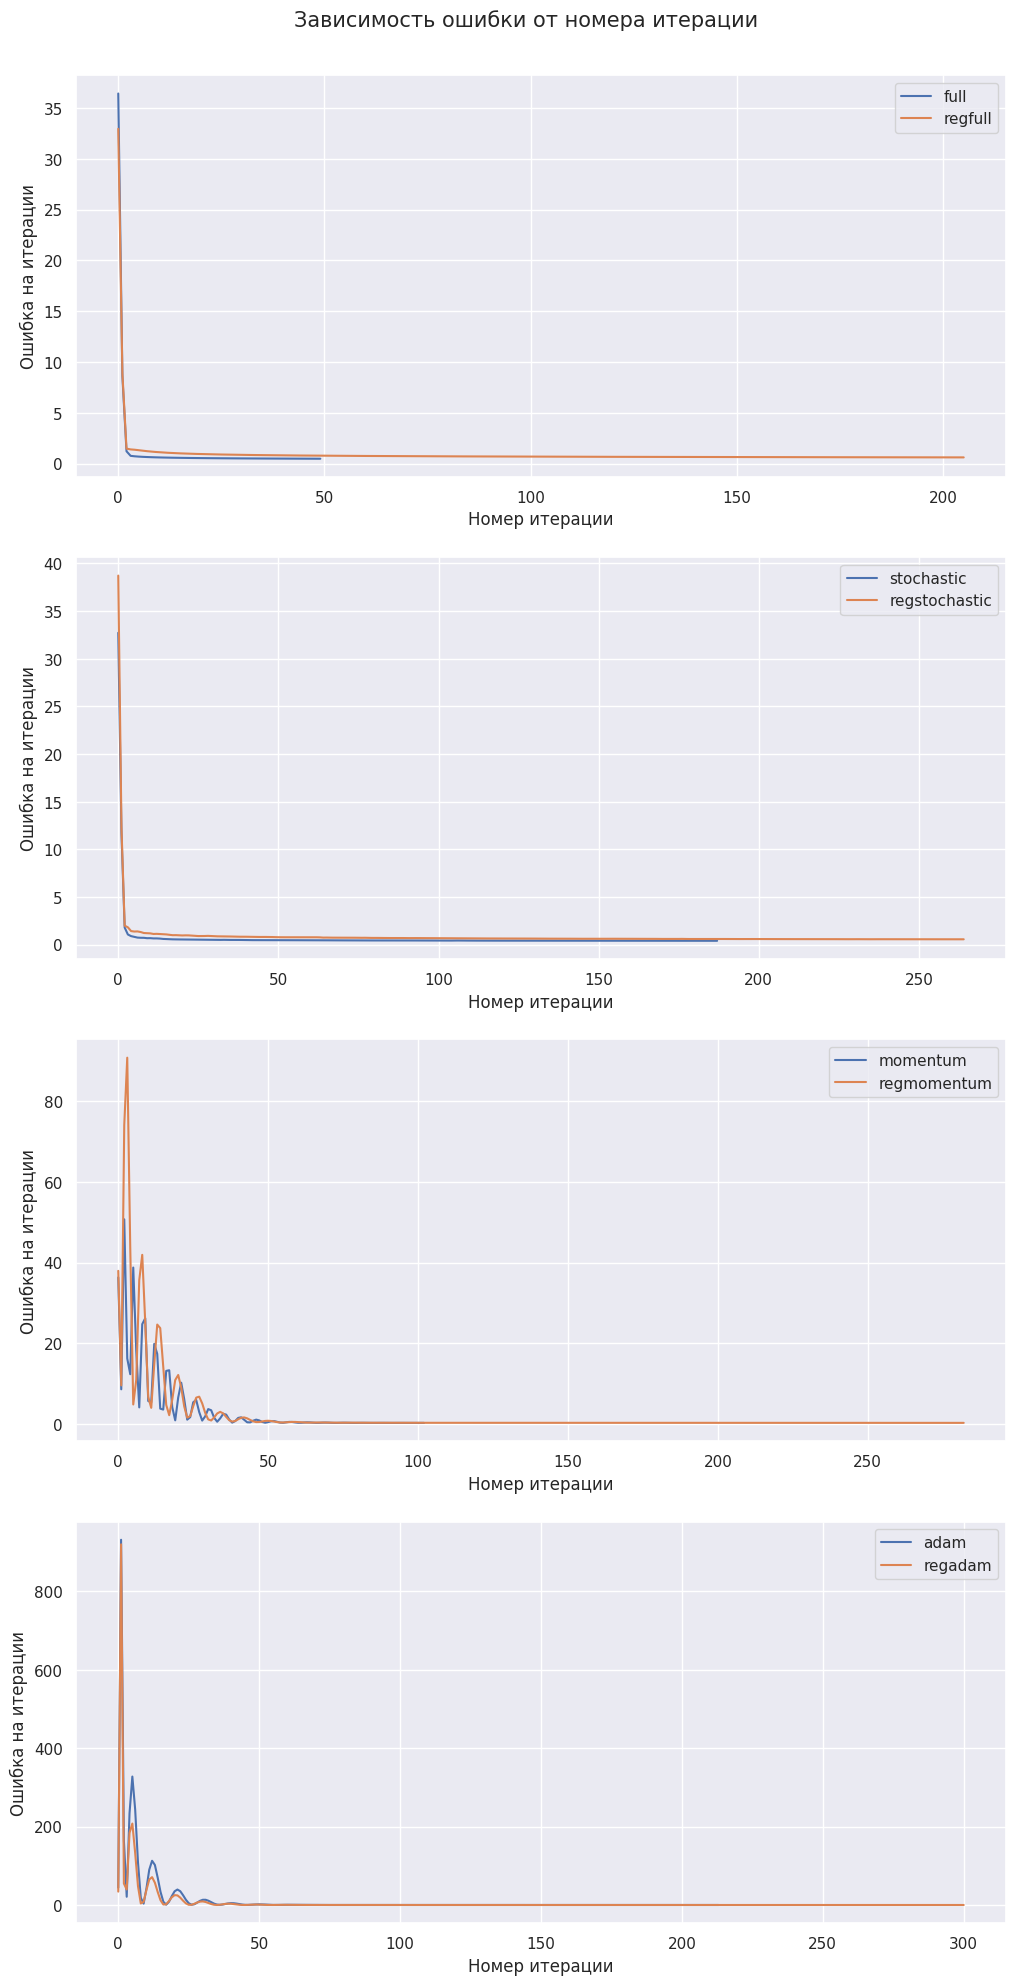

In [55]:
def func_to_plot(descent_name, ax):
    x_arr1 = err_iter_df[err_iter_df['method'] == descent_name]['iter'].tolist()
    x_arr2 = err_iter_lm_df[err_iter_lm_df['method'] == descent_name]['iter'].tolist()

    y_arr1 = err_iter_df[err_iter_df['method'] == descent_name]['loss_on_iter'].tolist()
    y_arr2 = err_iter_lm_df[err_iter_lm_df['method'] == descent_name]['loss_on_iter'].tolist()


    ax.plot(x_arr1, y_arr1, label=descent_name)
    ax.plot(x_arr2, y_arr2, label='reg' + descent_name)
    ax.set_xlabel("Номер итерации")
    ax.set_ylabel("Ошибка на итерации")
    ax.legend()

fig, axs = plt.subplots(4,1, figsize=(12, 22))
plt.suptitle("Зависимость ошибки от номера итерации", fontsize = 15)
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    func_to_plot(descent_name, axs[i])
fig.subplots_adjust(top=0.95)

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`


∇𝐿(y,a) = tanh(a-y)

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.




Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Денек нет друзей нет поэтому

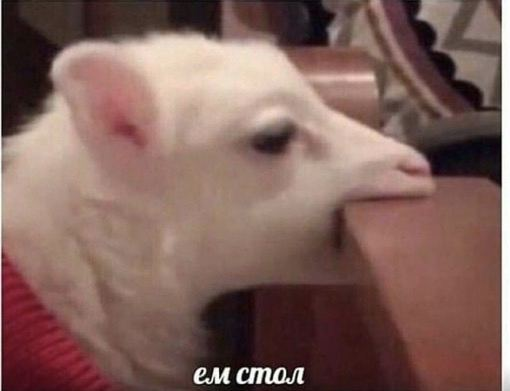

Один друг все-таки есть, поэтому будем готовить полнорационный диетический ужин, богатый витаминами и содержащий незаменимые Омега-3 жирные кислоты и нутриенты для поддержания здоровья пищеварительной системы и кожи.

И так, рецепт:

1. Берем упаковку с вкуснейшим богатейшим минералами и витаминами корма Royal Canin Hyppoallergenic и насыпаем в миску

2. Готовим необычайно вкусный и полезнейший соус - аква минерале и наливаем в миску для регуляризации скорости поедания (опционально)

3. Добавляем необходимые витамины (сезонные) для поддержания бодрого состояния (опционально) (это кстати лайфхак как давать таблетки без бойней)

Готово!

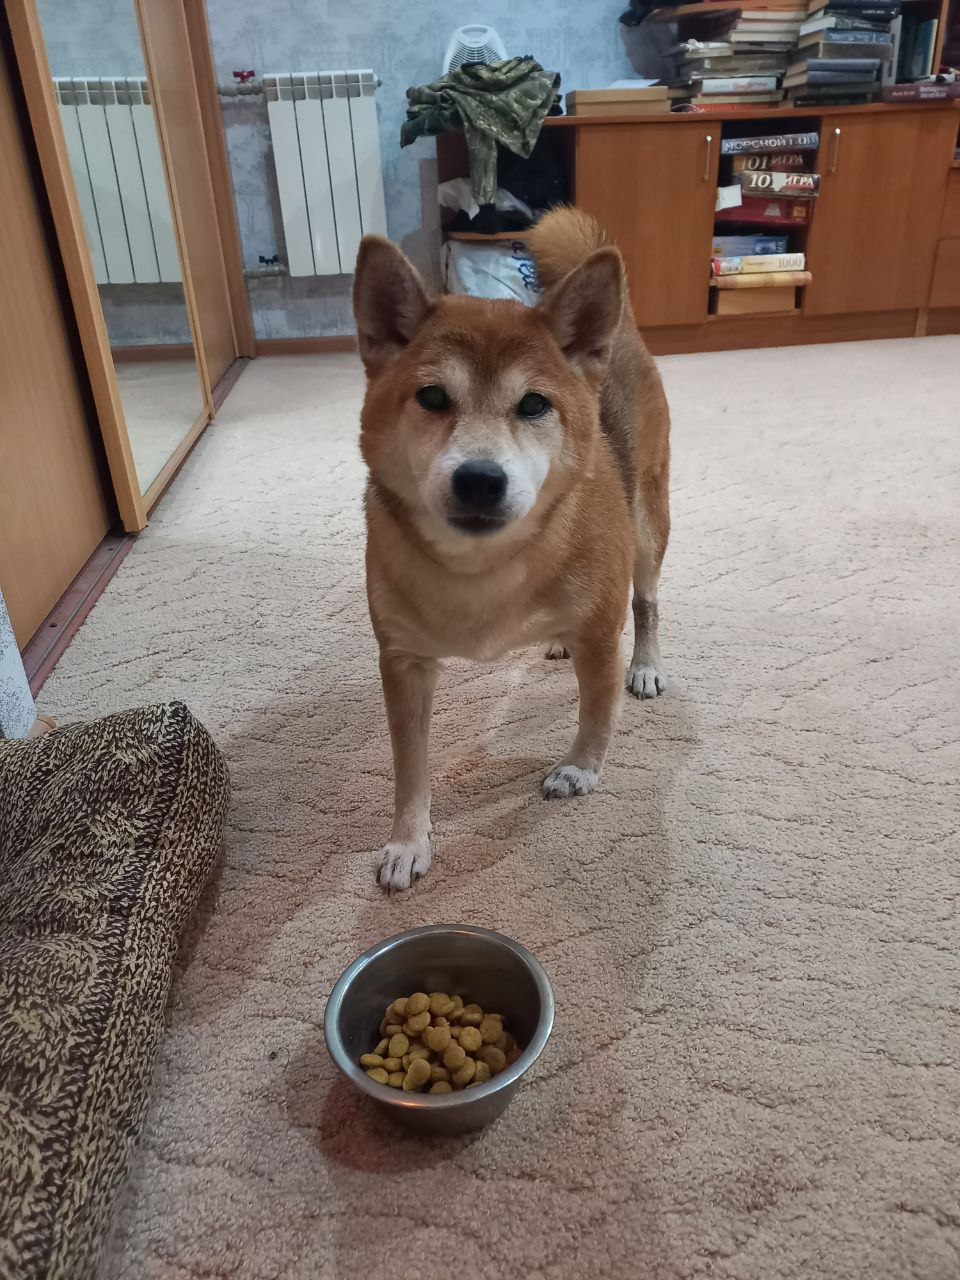

Довольный сытый друг:

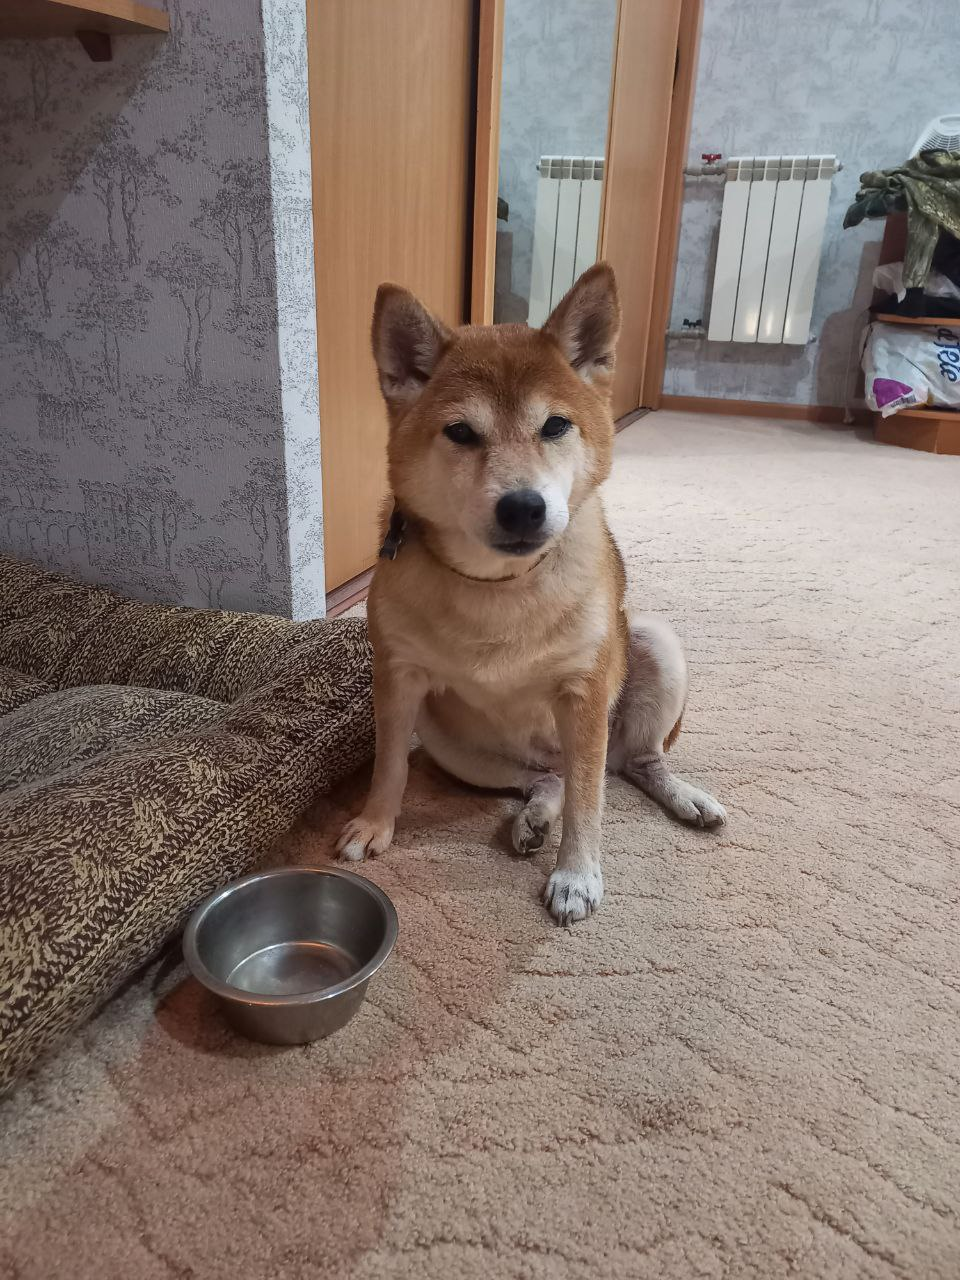

Наелся и спит

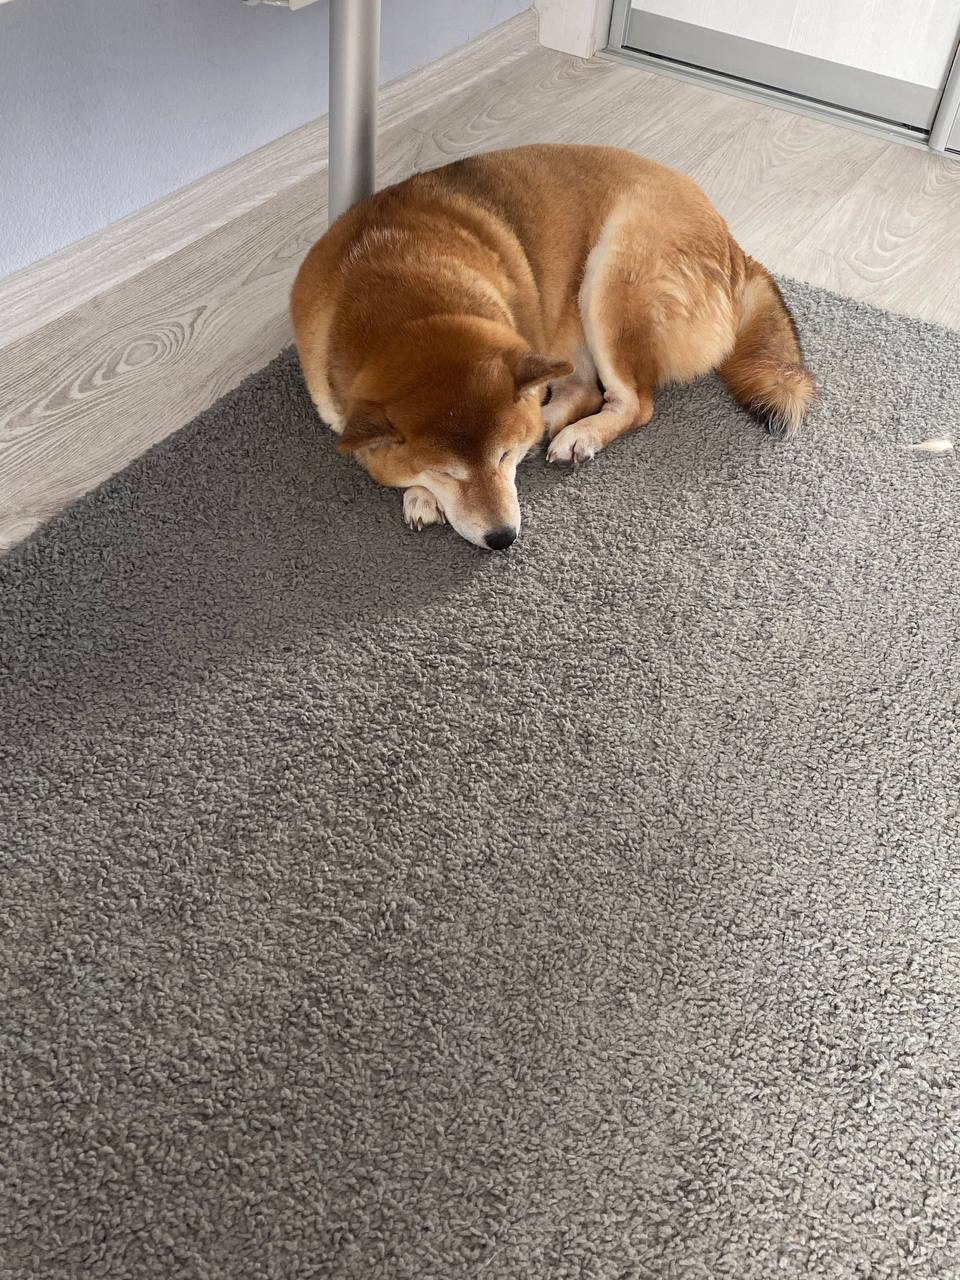

очень довольный друк

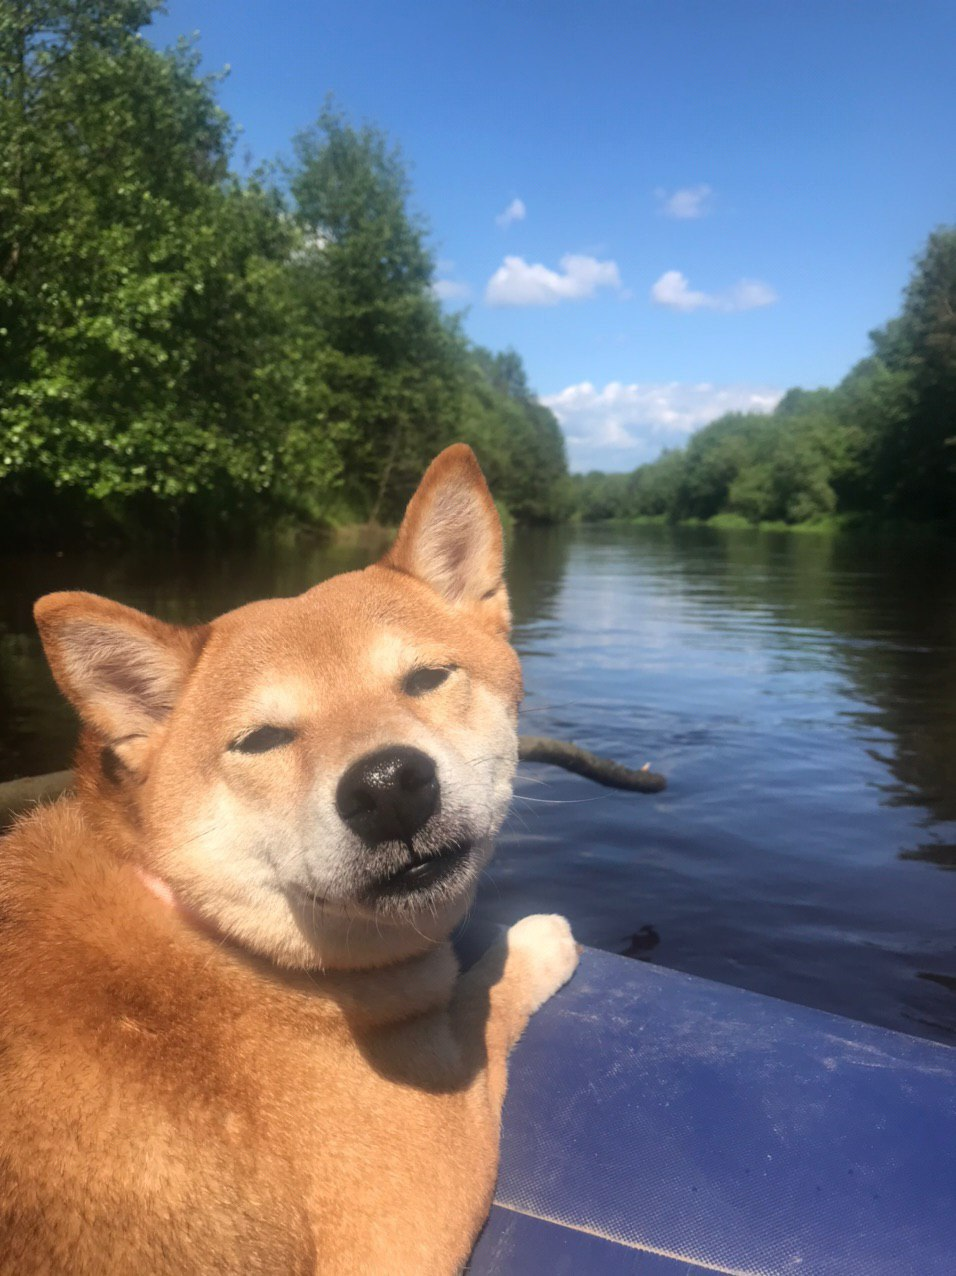

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: